<center>
<img src='..\assets\1\lang-pic.jpg' width=600>
</center>
    
# 1. Introduction

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.1 NLP series</p>

This is the **seventh in a series of notebooks** covering the **fundamentals of Natural Language Processing (NLP)**. I find that the best way to learn is by teaching others, hence why I am sharing my journey learning this field from scratch. I hope these notebooks can be helpful to you too. 

NLP series:

1. [Tokenization](./01_Tokenization.ipynb)
2. [Preprocessing](./02_Pre_Processing.ipynb)
3. [Bag of Words and Similarity](./03_BOW_Similarity.ipynb)
4. [TF-IDF and Document Search](./04_TFIDF_DocSearch.ipynb)
5. [Naive Bayes Text Classification](./05_NaiveBayes_TextClf.ipynb)
6. [LDA Topic Modelling](./06_LDA_TopicModelling.ipynb)
7. Word Embeddings
<a target="_blank" href="https://colab.research.google.com/github/JUSTSUJAY/NLP_One_Shot/blob/main/Notebooks/07_Word_Embeddings.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/JUSTSUJAY/NLP_One_Shot/blob/main/Notebooks/07_Word_Embeddings.ipynb)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.2 Outline</p>

So far we've seen how to **vectorize documents** of text either through Bag-of-Words or TF-IDF. While these approaches work well for simple NLP tasks like classification, they have the drawback that they don't capture any relationships between words. 

In this notebook, we will see how to **vectorize individual words** via **static embeddings** in order to **capture word meaning**. For example, this will let us model that "brother" and "sister" are more similar in meaning than "tree" and "car". Note that in a later notebook we will also cover **contextual embeddings** where the embedding can change depending on the context.

# 2. Word Embeddings

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.1 One-hot encoding</p>

The simplest way to vectorize a set of words, is to use **one-hot encoding**. This maps each word into a vector with length equal to the size of the vocabulary. The vector is completely filled with 0's except for a single entry, which has a 1 correspoding to the index of the word in the vocabulary. 

<br>
<center>
<img src="../assets/7/onehot.png" width=600>
</center>
<br>

This is a pretty **terrible way** to vectorize words, not only because it is very **memory inefficient** but also because there is no relationship between words. 

In particular, if the voculary contains 10,000 words, then each vector has length equal to 10,000. Furthermore, any two distinct vectors will always have a **dot product equal to 0**, corresponding to no similarity.

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.2 Capturing meaning</p>

A better way then would be to represent words as **shorter and denser vectors** that capture some meaning between words. And this is what an embedding aim to do. 

An **embedding** is simply a **representation of an object** (e.g. a word, movie, graph, etc) as a **vector of real numbers**. It *embeds* an object into a **high-dimensional vector space**. 

<br>
<center>
<img src="../assets/7/unitcube.png" width=300>
</center>
<br>

For example, let's say you have a collection of videos games. We can represent each game by measuring a number of its **attributes** like `[<fantasy>,<strategy>,<multiplayer>,<action>,<adventure>]`. So a game like 'Minecraft' could be represented by `[0.1,0.6,0.4,0.5,0.9]` (although the numbers don't have to be between 0 and 1) and if we wanted to find similar game, we could return the game with the **highest similar score**. 

Notice how there are many **different ways to embed the same object**. Moreover, the features we hand-selected may not be the best ones to represent these objects. But the main idea is to find a representation where **similar objects** (i.e. are semantically similar) are **close together**. We can do this with words too, but how do we find their best representations?

<br>
<center>
<img src="../assets/7/embed.jpg" width=700>
</center>
<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.3 Distributional Hypothesis</p>

To train a word embedding, we first need to ask ourselves what makes two words **semantically similar**? One popular answer to this is the **distributional hypothesis**, which says that "words which appear in **similar contexts** (i.e. share similar surrounding words) have **similar meanings**". 

For example, consider the sentence "My family enjoys eating bacalhau at Christmas". You probably have no idea what 'bacalhau' is but just from the **context** we can **infer** that it is some kind of food. (In fact, the word refers to Portuguese salted cod.)

That are many algorithms that use this idea to **train word embeddings**. We are going to focus on the main one, namely **Word2vec**, which was developed in 2013 at Google and was a breakthrough in NLP at the time. ([link to paper](https://arxiv.org/abs/1301.3781))

# 3. Word2vec

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.1 Word addition</p>

Word2vec is a way of **learning** word embeddings by **training shallow neural networks** on either the continuous bag-of-words or the skip-gram task. We will discuss both of these shortly. The **dimension** of the resulting dense vectors is usually between 50-1000 and a common value is 300.  

<br>
<center>
<img src="../assets/7/word2vec.png" width=500>
</center>
<br>

The amazing thing to come out of Word2vec is not only that similar words are close together, but that we can perform **addition and subtraction** on these word vectors. For example, **“king” - “man” + “woman” = "queen"**. That is, if we take the vectors for king, man, woman and add/subtract them in this way, we will end up with a vector close to the one corresponding to queen. This means that these vectors can **capture very precisely** abstract concepts (like gender and royalty) without any input from us.

Note that the values in each vector don't necessarily correspond to anything like fantasy, strategy, etc like in the video game example from before. The algorithm learns the best representation even if the **numbers don't correspond to anything tangible**. The most important thing though is that similar words are close together. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.2 Training Word2vec</p>

Word2vec is a collection of **two algorithms** that each learn word vectors **indirectly** through a word prediction task. One option is **Continuous Bag-of-Words** (CBOW) and the other is **skip-gram**. 

<br>
<center>
<img src="../assets/7/cbow.png" width=600>
</center>
<br>

In CBOW, the task is to **predict the missing word** from its surrounding words whereas in skip-gram the task is to **predict the surrounging words** given a single word. They are both quite similar so we will just focus on skip-gram (with an optimized adjustment called **negative sampling**) in this notebook.

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.3 Skip-Gram with Negative Sampling</p>

The goal of **Skip-Gram with Negative Sampling** (SGNS) is to maximise the similarity between words that appear in **similar contexts** and conversely minize the similar between words that do not appear in similar contexts. Note that depending on the corpus you train on you will get different results. 

Consider the following sentence: "We ate pizza at the Italian restaurant". In SGNS we designate a word, for example "pizza", to be the **input word**. The words around the input word become the **context words**. From this, we generate **input/context pairs**: (pizza, We), (pizza,ate), (pizza,at), (pizza,the), (pizza,Italian) and (pizza,restaurant). These pairs are considered **positive examples**.

Note that in practice there is a **context window** that limits context words to only e.g. 2 either side the input word. This is treated as a hyperparamenter that can be tuned. Furthermore, generating positive samples can be done in a **sliding window fashion**, where we move by one word to the right each time. 

<br>
<center>
<img src="../assets/7/skipgram.png" width=600>
</center>
<br>

We also generate **negative samples** by selecting words (called **negative context words**) at random from the corpus, e.g. (pizza,hero), (pizza,skip), (pizza,restoration), (pizza,crew), etc. It is ok if context words also appear as negative context words - the chance of this happening is small anyway.

Doing this repeatedly for the whole corpus generates a **training set** of positive and negative examples. What is amazing is that **no labelling was needed** at any point. (This is an example of **self-supervised learning**.)

This training set gives rise to a **binary prediction task**, which is to predict if two words are either likely or unlikely to appear close to each other in text. We will see that learning to do this task well will lead us to our desired word embeddings. 

We start by creating **two matrices initialised randomly** both with **dimensions |V| x d**, where |V| is the size of the vocabulary and d is the size of the word vectors (e.g. d=300). The first matrix will hold the **input word embeddings** and the second will hold the **context word embeddings**. The word "pizza" (and any other word) will have a vector in each matrix but the idea is that when "pizza" is an input word, the input matrix will get updated whereas when it is a context word, the context matrix will get updated. 

At each training iteration we pick **one positive sample** $(w, c_{pos})$ and **k negative samples** $(w,c_{neg(i)})$ (k is a hyperparameter, k=3 is common). For example, let (pizza,restaurant) be the positive sample. The important thing is that we take vector for "pizza" from the input matrix and the vector for "restaurant" from the context matrix. Similarly we do the same for the negative samples. 

The **probability** that words in a positive (resp. negative) example appear close to each other (resp. don't appear close to each other) is calculated as follows

<br>

$$
\large
\mathbb{P}(+|w,c_{pos}) = \sigma (w \cdot c_{pos}), \qquad \quad \mathbb{P}(-|w,c_{neg}) = 1 - \mathbb{P}(+|w,c_{neg}) = \sigma (- w \cdot c_{neg})
$$

<br>

The **dot product** is used to measure similarity (like in cosine similarity) and the **sigmoid function** is there to convert the numbers into probabilities. We want to **maximize** both quantities so we use the loss function (working in log space makes derivates easier to calculate)

<br>

$$
\large
\begin{align*}
L &= - [\log \mathbb{P}(+|w,c_{pos}) + \sum_{i}^{k} \log \mathbb{P}(-|w,c_{neg(i)})] \\
&= - [\log \sigma (w \cdot c_{pos}) + \sum_{i}^{k} \log \sigma (- w \cdot c_{neg(i)})] \\
\end{align*}
$$

<br>

**Minimizing** this loss function will maximise the probabilities above, which have been constructed to force similar words to be close to each other and disimilar words to be far away from each other. We can use any **optimization algorithm** we want to do this, for example stochastic gradient descent or the Adam optimizer. During training, the two matrices (corresponding input and context) get updated at each iteration. Once training is completed, we will have arrived at the word embeddings we wanted. Usually just the input matrix embedding is used but you could also average the two matrices together.

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.4 Training tricks</p>

There are a few tricks used in practice to **maximise the performance** of the skip-gram model and thus **improve the quality** of the embeddings. First, the following formula is commonly used when sampling **negative context words** in negative examples. This is basically the **relative frequency** of each word but with a modification that puts **more weight on rare words** and less weight on common words. The authors suggest $\alpha=0.75$ is a good choice for this hyperparameter. 

<br>

$$
\large
\mathbb{P}_{\alpha}(w) = \frac{\text{count}(w)^{\alpha}}{\sum_i \text{count}(w_i)^{\alpha}}
$$

<br>

The **window size** when sampling **positive examples** is also a hyperparameter as we said earlier. Researchers have found that **narrower windows** are better at capturing **functional similarity** better whereas wider windows are better at capturing **relatedness**. 

The **number of negative samples** selected at each iteration is controlled by the hyperparameter **k**. For large datasets, k is recommended to be between **2-5** whereas for smaller datasets a better choice is between **5-20**. 

Finally, in some implementations of Word2vec each word vector (input/context) gets passed through a **layer** of a **connected neural network** before the dot product is taken. This can improve the performance of the model but conceptually the process of learning the word embeddings is the same. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.5 Using word vectors</p>

Training accurate word embeddings from scratch takes a **lot of computational resources**. If we want to use word vectors in our models then we have a few options depending on the requirements of our task.

1. Use **pre-trained word vectors** as model inputs and keep them **constant during training**. 
2. Use **pre-trained word vectors** as model inputs and allow the model to **tune** them during training. 
3. **Train word embeddings from scratch** at the same time as training the model. 

Option 1 will be the **fastest** and will usually lead to very good results. Option 2 can produce **marginally better results** if you are willing to take longer to train your model. Option 3 can be useful if you have **lots of training data** and want to train a model for a very **specific task** that pretrained embeddings don't perform well on. We will explore these different options with code in the next section. 

# 4. Application

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.1 Word vectors</p>

We're going to be using **pre-trained word vectors** via the **Gensim** library, which we came across last time. These particular vectors are known as the **Google News vectors** as they were trained on a 3 billion word Google News corpus in 2015. In total, there are **3 million, 300-dimension vectors**. 
<br>

* GoogleNews-vectors-negative300 - [Link](https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300)
* Spotify App Reviews - [Link](https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022)

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import spacy
import random
import collections
import re
import emoji

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gensim

**Load word vectors**

The word vectors are stored in a kaggle dataset. We use the gensim library to load them.

In [2]:
%%time

# Path to dataset
word2vec_path = "../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"

# Load 200,000 most common words
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=200000) 

CPU times: user 2.21 s, sys: 452 ms, total: 2.67 s
Wall time: 5.18 s


We can **retrieve** a single word vector by passing the token as the key.

In [3]:
# Get word vector
science = word2vec_model['science']

# Print shape and vector
print('Vector dimension:', science.shape)
print(science)

Vector dimension: (300,)
[ 0.0090332   0.12158203  0.3984375   0.21386719 -0.01672363  0.06396484
  0.3125     -0.23535156 -0.10009766 -0.09326172  0.20507812 -0.03222656
 -0.21191406  0.00958252 -0.27734375  0.09619141 -0.1875     -0.04052734
  0.2265625  -0.23632812 -0.04858398  0.03295898 -0.08056641  0.12255859
  0.05859375 -0.09130859 -0.02685547  0.02587891 -0.11376953 -0.21972656
 -0.0378418  -0.15722656 -0.05981445 -0.01635742  0.11425781 -0.15234375
 -0.01086426  0.29296875  0.22265625 -0.00245667 -0.16308594 -0.11669922
 -0.20800781  0.31835938 -0.08740234  0.13378906  0.15429688  0.11816406
 -0.07470703  0.09326172 -0.32421875  0.01239014 -0.07226562 -0.10986328
 -0.07177734  0.16113281  0.05541992 -0.3984375  -0.04980469 -0.25195312
 -0.05249023 -0.05786133  0.16699219 -0.26953125 -0.04394531 -0.14257812
  0.03662109  0.34765625 -0.10888672 -0.12011719 -0.19335938 -0.21972656
  0.16015625 -0.06542969 -0.22070312  0.1484375   0.23144531  0.11669922
 -0.15429688  0.04174805 -

And we can measure the similarity between any two words by using the `.similarity` method.

In [4]:
print(word2vec_model.similarity('science', 'mathematics'))
print(word2vec_model.similarity('science', 'space'))
print(word2vec_model.similarity('science', 'beard'))

0.630091
0.23719835
0.0036594481


We can measure the similarity between sentences by using the `.n_similarity` method. This expects a list of words and works by **averaging** the word vectors in each sentence and computing the cosine similarity between the resulting two vectors. This doesn't take word order into account but works quite well.

In [5]:
word2vec_model.n_similarity("Man goes running".split(),"Woman goes swimming".split())

0.6724018

Gensim also has a `.most_similar` method, which returns the **closest** word vectors to the input.

In [6]:
word2vec_model.most_similar(positive=['jelly'], topn=10)

[('custard', 0.5662760734558105),
 ('Jell_O', 0.5641272068023682),
 ('chocolate_pudding', 0.5506998300552368),
 ('marshmallow', 0.546853244304657),
 ('marmalade', 0.5442028641700745),
 ('jellies', 0.5395851731300354),
 ('Jello', 0.5389018654823303),
 ('gummy', 0.5371953248977661),
 ('gelatinous', 0.5302338004112244),
 ('mousse', 0.5300459861755371)]

We can visualize the word vectors in **2 dimensions by using PCA**, which is **dimensionality reduction technique**. This finds the subspace that **maximizes the variance** of the data, in other words it finds the 2-D plane where the data points are as spread out as possible. This allows us to get a better idea of the structure and patterns in the word vectors.

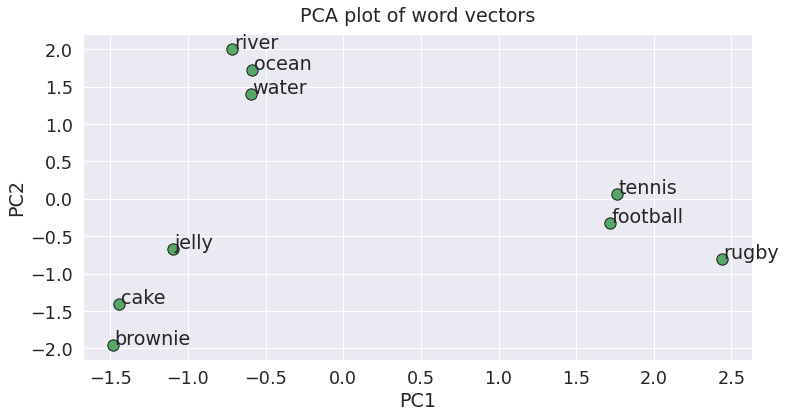

In [7]:
# Vectors to transform
words = ["football","tennis","rugby","river","ocean","water","brownie","jelly","cake"] #['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus']
word_vectors = np.array([word2vec_model[w] for w in words])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

# Plot transformed vectors
plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0], X_pca[:,1], edgecolors='k', c='g', s=128)
for word, (x,y) in zip(words, X_pca):
    plt.text(x+0.01,y+0.01, word)
plt.title("PCA plot of word vectors", y=1.02)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Like we discussed previously, Word2vec can solve **analogies**. In gensim, we just need to specify the **positive terms** and the **negative terms** and it will retrieve the closest vector to the result.

For example, "France"-"Paris"+"Tokyo" should give us "Japan" as Tokyo is the capital of Japan and indeed it does.

In [8]:
word2vec_model.most_similar(positive=["France", "Tokyo"], negative=["Paris"], topn=3)

[('Japan', 0.8167770504951477),
 ('Japanese', 0.6480902433395386),
 ('South_Korea', 0.6141558885574341)]

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.2 Modelling with pre-trained word embeddings</p>

To showcase how word embeddings can be used in neural networks, we are going to perform sentiment analysis on a **spotify app reviews dataset**. Each review has a corresponding number of **stars** awarded **between 1 and 5**, which is what we are going to try to predict.

In [9]:
# Load data
data = pd.read_csv("/kaggle/input/spotify-app-reviews-2022/reviews.csv")
data = data[["Review","Rating"]]

# Print shape and preview
print(data.shape)
data.head()

(61594, 2)


,Review,Rating
0,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5
1,Please ignore previous negative rating. This app is super great. I give it five stars+,5
2,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1


Currently some of the reviews are very **long** (the maximum is over 3000 characters!). Later in our keras model we will truncate these so they are **not longer than 250 characters**, which will speed up training time.

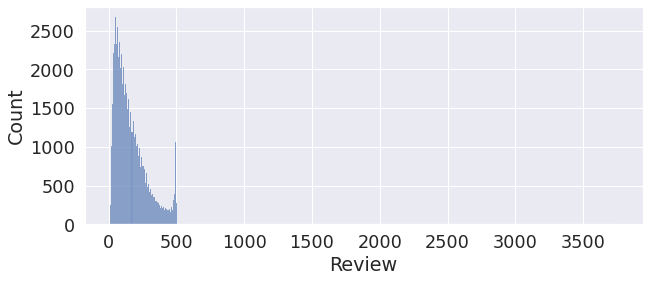

In [10]:
# Lenght of reviews
plt.figure(figsize=(10,4))
sns.histplot(data["Review"].apply(lambda x : len(x)))
plt.show()

We'll also do some basic **data cleaning**.

In [11]:
# Clean text function
def clean_text(text):
    text = emoji.demojize(text)                # Remove emojis
    text = text.replace('_', ' ')              # Replace underscores with space
    text = text.strip()                        # Remove extra spaces
    return text

# Applying cleaning function
data["Review"] = data["Review"].apply(lambda x: clean_text(x))

Let's take a look at the **target distribution**. We can see there is an **imbalance** with more ratings leaning towards the **extremes**. We going to treat this problem as a **multiclass classification** one. 

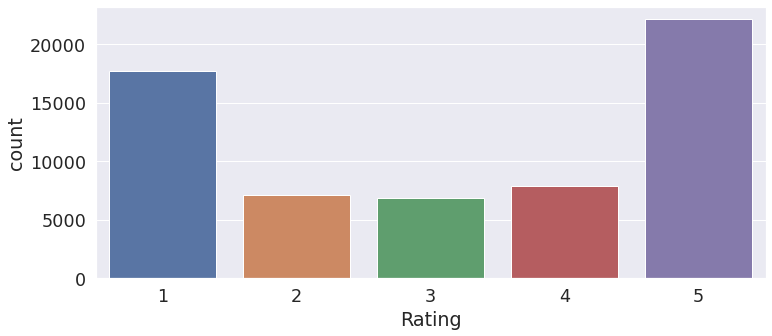

In [12]:
# Lenght of reviews
plt.figure(figsize=(12,5))
sns.countplot(data=data, x="Rating")
plt.show()

**Features and labels**

In [13]:
# Define features and labels
X = data["Review"]
y = data["Rating"] - 1         # map to 0,1,2,3,4

**Train-valid-test split**

In [14]:
# Create train, validation and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.25, shuffle=True, stratify=y_tr, random_state=0) # 0.25 * 0.8 = 0.2

# Print shapes
print("Train size:", X_train.shape)
print("Valid size:", X_valid.shape)
print("Test size:", X_test.shape)

Train size: (36956,)
Valid size: (12319,)
Test size: (12319,)


**Tokenizer**

<br>

Instead of using spacy, this time we will create a **tokenizer using keras** because it will more easily integrate with our keras model. We set it to **remove special characters**, **lower case** all words and only use the **most frequent 20000 words**. This allows the model to focus only on the most frequent words that are **relevant to the sentiment** and speeds up training time. 

In [15]:
# Keras tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(num_words=20000, filters='0123456789!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Build vocabulary on train set
tokenizer.fit_on_texts(X_train)

**Vectorize**

We are going to vectorize by mapping every token to an **integer ID** that we can use to look up word vectors.

In [16]:
# Vectorize
X_train_ids = tokenizer.texts_to_sequences(X_train)
X_valid_ids = tokenizer.texts_to_sequences(X_valid)
X_test_ids = tokenizer.texts_to_sequences(X_test)

# Example
print(X_train_ids[0][:10])

[1, 116, 8, 29, 28, 944, 25, 10, 211, 22]


Padding is a common technique used to convert all the sequences to the **same length**. Longer sequences are truncated and shorter sequences are padded with 0's at the beginning. This is required for some models (not here) but it can also make it **easier to optimize** the loss function. 

In [17]:
# Max length of sequences
max_length = 250

# Pad sequences
X_train_pad = keras.preprocessing.sequence.pad_sequences(X_train_ids, maxlen=max_length)
X_valid_pad = keras.preprocessing.sequence.pad_sequences(X_valid_ids, maxlen=max_length)
X_test_pad = keras.preprocessing.sequence.pad_sequences(X_test_ids, maxlen=max_length)

# Example
print(X_train_pad[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1 116   8  29  28 944  25
  10 211  22   5 265  74 187  22   8  27 108  89  28 944 226   5   5  98
 273 187  22  45 944 294  30  80  39 205  40  75   

**Lookup dictionary**

<br>

We now to **map** the word ids to the word vectors in gensim so we can use them in our model. We do this by creating an **embedding matrix** that stores the word vectors in the right order if they exist (otherwise fill that row with 0's).

In [18]:
# Load 1,000,000 most common words
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1_000_000)

# Add one for padding token
num_tokens = len(tokenizer.word_index) + 1

# Word vector dimension
embedding_dim = 300

# Initialize matrix of zeros
embedding_matrix = np.zeros((num_tokens, embedding_dim))

# Fill embedding matrix
for word, i in tokenizer.word_index.items():
    if word2vec_model.has_index_for(word):
        embedding_matrix[i] = word2vec_model[word].copy()

Note that there are **many words** which we **could not find word vectors for**. This is likely because they were trained on a news corpus whereas our dataset is a corpus of app reviews and they each use quite a different vocabulary. 

In [19]:
print("Embedding matrix shape:", embedding_matrix.shape)
print("Number of words without word vectors", int((embedding_matrix==0).sum()/300))

Embedding matrix shape: (18453, 300)
Number of words without word vectors 5563


**Build model**

We're now ready to build the model. The first layer of the neural network will be an **embedding layer** with our embedding matrix as input. We'll set `trainable = True` so the model can **fine tune** these word vectors. This is a good idea since we found out many of the vectors are 0's. 

In [20]:
# Embedding layer with pre-trained word vectors
embedding_layer = layers.Embedding(
    input_dim = num_tokens,
    output_dim = embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    input_length = max_length,
    trainable = True
)

In [21]:
# Build model
def build_model(embedding_layer):
    model = keras.Sequential([

        # Look up word vectors from integer ids
        embedding_layer,
        
        # Average all word vectors in sequence
        layers.GlobalAveragePooling1D(),
        
        # Fully connected layers
        layers.Dense(units=256, activation='relu', kernel_initializer=tf.keras.initializers.random_normal()),
        layers.Dense(units=128, activation='relu', kernel_initializer=tf.keras.initializers.random_normal()),
        
        # Output layer (softmax returns a probability distribution)
        layers.Dense(units=5, activation='softmax', kernel_initializer=tf.keras.initializers.random_normal())
    ])
    
    # Define optimizer, loss function and accuracy metric
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    return model

Notice how most of the **model parameters** come from the embedding layer.

In [22]:
# Build model
model = build_model(embedding_layer)

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 300)          5535900   
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               77056     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 5,646,497
Trainable params: 5,646,497
Non-trainable params: 0
_________________________________________________________________


2023-02-20 21:21:51.886620: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Train model**

In [23]:
# Train model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_valid_pad, y_valid),
    epochs=10,
    batch_size=128,
    verbose=True
)

2023-02-20 21:21:52.290756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
289/289 [==============================] - 21s 70ms/step - loss: 1.2343 - sparse_categorical_accuracy: 0.5198 - val_loss: 1.0642 - val_sparse_categorical_accuracy: 0.5894
Epoch 2/10
289/289 [==============================] - 20s 70ms/step - loss: 0.9959 - sparse_categorical_accuracy: 0.6153 - val_loss: 0.9926 - val_sparse_categorical_accuracy: 0.6160
Epoch 3/10
289/289 [==============================] - 20s 68ms/step - loss: 0.9226 - sparse_categorical_accuracy: 0.6420 - val_loss: 0.9635 - val_sparse_categorical_accuracy: 0.6246
Epoch 4/10
289/289 [==============================] - 20s 69ms/step - loss: 0.8893 - sparse_categorical_accuracy: 0.6544 - val_loss: 0.9723 - val_sparse_categorical_accuracy: 0.6232
Epoch 5/10
289/289 [==============================] - 20s 68ms/step - loss: 0.8596 - sparse_categorical_accuracy: 0.6646 - val_loss: 0.9782 - val_sparse_categorical_accuracy: 0.6225
Epoch 6/10
289/289 [==============================] - 20s 69ms/step - loss: 0.8368 - spars

**Learning curves**

<br>

It is clear that the model begins to **overfit very quickly** because of the large number of **trainable parameters** in our model. If we set `trainable = False` then we would see less overfitting, although the accuracy wouldn't necessarily improve by much. In future notebooks, we will explore how to reach better performance with sequential neural networks.

Final accuracy on validation set: 0.6120626926422119


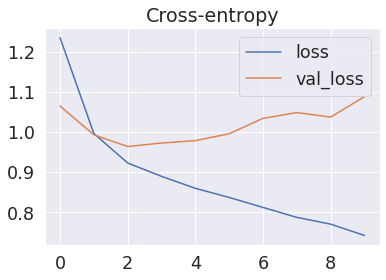

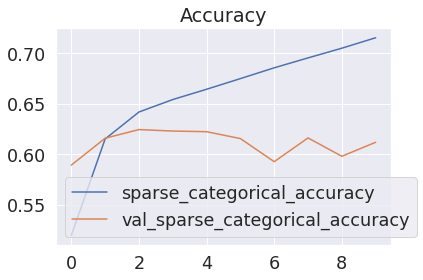

In [24]:
# Plot learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(title="Accuracy")

print('Final accuracy on validation set:', history_df.loc[len(history_df)-1,'val_sparse_categorical_accuracy'])

**Evaluate on test set**

In [25]:
# Make predictions on test set
preds = model.predict(X_test_pad)

# Retrieve most likely class
class_preds = np.argmax(preds,axis=1)

# Print accuracy
print(f"Test set accuracy: {accuracy_score(y_test, class_preds):.4f}")

Test set accuracy: 0.6151


Even though the accuracy is low, our **model did fairly well** considering there are **5 classes to predict**. In general it managed to work out if a review was positive or negative quite well.

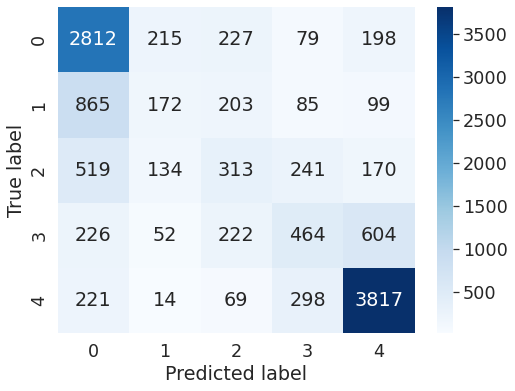

In [26]:
# Confusion matrix
cm = confusion_matrix(y_test, class_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.3 Modelling with word embeddings from scratch</p>

Sometimes we might not want to use pretrained word embeddings and instead let our model figure out the **best word representations for our task** at hand. By default, the keras embedding layer does this **automatically**. 

In [27]:
# Embedding layer to train from scratch
embedding_layer = layers.Embedding(
    input_dim = num_tokens,
    output_dim = embedding_dim,
    input_length = max_length
)

**Train model**

In [28]:
# Build and train model
model_sc = build_model(embedding_layer)
history_sc = model_sc.fit(
    X_train_pad, y_train,
    validation_data=(X_valid_pad, y_valid),
    epochs=10,
    batch_size=128,
    verbose=True
)

Epoch 1/10
289/289 [==============================] - 20s 69ms/step - loss: 1.3034 - sparse_categorical_accuracy: 0.4702 - val_loss: 1.1006 - val_sparse_categorical_accuracy: 0.5856
Epoch 2/10
289/289 [==============================] - 20s 69ms/step - loss: 1.0093 - sparse_categorical_accuracy: 0.6129 - val_loss: 0.9731 - val_sparse_categorical_accuracy: 0.6189
Epoch 3/10
289/289 [==============================] - 20s 69ms/step - loss: 0.9294 - sparse_categorical_accuracy: 0.6398 - val_loss: 0.9606 - val_sparse_categorical_accuracy: 0.6263
Epoch 4/10
289/289 [==============================] - 19s 67ms/step - loss: 0.8911 - sparse_categorical_accuracy: 0.6525 - val_loss: 0.9706 - val_sparse_categorical_accuracy: 0.6227
Epoch 5/10
289/289 [==============================] - 20s 69ms/step - loss: 0.8696 - sparse_categorical_accuracy: 0.6630 - val_loss: 0.9761 - val_sparse_categorical_accuracy: 0.6232
Epoch 6/10
289/289 [==============================] - 20s 68ms/step - loss: 0.8396 - spars

**Learning curves**

Final accuracy on validation set: 0.5893335342407227


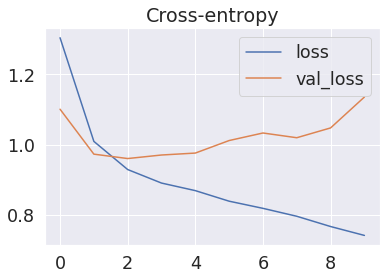

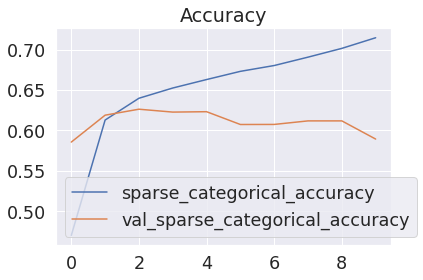

In [29]:
# Plot learning curves
history_sc_df = pd.DataFrame(history_sc.history)
history_sc_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_sc_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(title="Accuracy")

print('Final accuracy on validation set:', history_sc_df.loc[len(history_sc_df)-1,'val_sparse_categorical_accuracy'])

**Evaluate on test set**

In [30]:
# Make predictions on test set
preds_sc = model_sc.predict(X_test_pad)

# Retrieve most likely class
class_preds_sc = np.argmax(preds_sc,axis=1)

# Print accuracy
print(f"Test set accuracy: {accuracy_score(y_test, class_preds_sc):.4f}")

Test set accuracy: 0.5939


For this task, training our own word embeddings from scratch **performed roughly the same** as using word2vec embeddings. This means there is **sufficient data** to learn good representations for our task. 

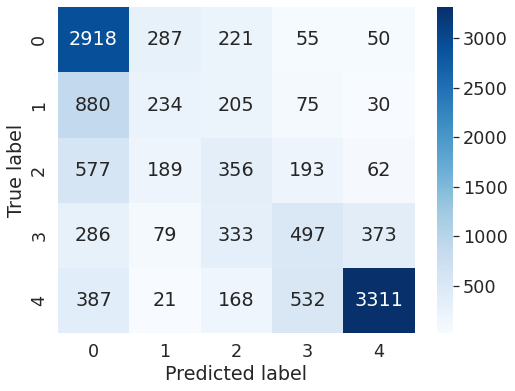

In [31]:
# Confusion matrix
cm_sc = confusion_matrix(y_test, class_preds_sc)
plt.figure(figsize=(8,6))
sns.heatmap(cm_sc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# 5. Conclusion

In this notebook, we saw how to vectorize individual words through **embeddings** to capture meaning between words. We showed how Word2vec learnt these embeddings and its remarkable ability to solve **analogies**. Finally, we trained **neural networks** to perform a classification task using pre-trained and co-trained embeddings. 

Using pre-trained word embeddings works great in situations where there is **little training data**. But if you have sufficient data to train your own embeddings, this will usually perform just as well if not better. 

There are many alternatives to Word2vec. These include

* **GloVe** (Global vectors for word representations) - uses global co-occurance counts. 
* **Doc2vec** - represents whole documents as dense vectors.
* **fastText** - vectorizes subwords, i.e. a character n-gram, which helps deal with out-of-vocabulary scenarios. 

Even though word embeddings were **revolutionary** when they came out less than a decade ago, they have already become **outdated**. The world has moved on from static word embeddings because they have significant **shortcomings**: 

* They are **difficult to scale** - models would have to be retrained as languages evolve and new words get invented. 
* They are **static** - this doesn't capture that words have different meanings depending on their context, e.g. bat can be an object or an animal. 

Nowaways state-of-the-art NLP models almost all rely on **transformers**, which we will discuss in a later notebook.

**References:**
* [NLP demystified](https://www.nlpdemystified.org/)

### Coming UP
#### [8. Recurrent Neural Networks (RNNs) and Language Modelling](./08_RNNs_LMs.ipynb)

Thanks for reading!